# An Examination of School Improvement Grants 2010

## The questions I want to answer:
============================================

1. What is the total amount of funding? How much of the funding is allocated to each type of school models?  

2. How much money allocated to each State? Are certain States allocated more money than others?

3. What types of models of reform did schools choose in each state. What are the most prevelant types of models chosen in each state?

4. How much money is allocated to each state based upon the models chosen?

5. Which Districts have the most amount of money pledged to them? 

6. What is the amount of funding allocated to each school and type of model they have chosen?


In [1]:
from urllib.request import urlretrieve
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
# requires version >= 1.9.0
init_notebook_mode(connected=True) # run at the start of every notebook

#importing all necessary modules

In [2]:
!cd ~/Documents/Data_Science/DataSets
#Changing my directory to download csv

In [3]:
url= 'https://inventory.data.gov/dataset/ce23c458-9c25-4bcc-a7bd-0490641dec8e/resource/9665a448-6f2f-4872-99b9-bf12b5af84f4/download/userssharedsdfschoolimprovement2010grants.csv'
#Passing the the url to the url variable for retrieval
_=urlretrieve(url,'Schools.csv')
#Using the url retrieval tool to pull the file off the web and create a csv named Schools.csv

# Exploring the structure of the data for analysis

In [4]:
schooldfs= pd.read_csv('Schools.csv')
#Reading the csv file fro the directory i placed it in.
print('The columns for school dataframe')
print(schooldfs.columns)
#Looking at the columns for the DataFrame
print('\nThe data structure for the school dataframe')
print(schooldfs.info())
#Examining the information for each of the columns.

The columns for school dataframe
Index(['School Name', 'City', 'State', 'District Name', '2010/11/Award Amount',
       'Model Selected', 'Location'],
      dtype='object')

The data structure for the school dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 7 columns):
School Name             831 non-null object
City                    831 non-null object
State                   831 non-null object
District Name           831 non-null object
2010/11/Award Amount    757 non-null object
Model Selected          825 non-null object
Location                831 non-null object
dtypes: object(7)
memory usage: 45.5+ KB
None


===============================================================


I see that we have some missing values in columns above. I will have to examine the metadata at https://catalog.data.gov/dataset/school-improvement-2010-grants.

===============================================================

### Cleaning and Transformation

In [5]:
schooldfs['2010/11/Award Amount']=schooldfs['2010/11/Award Amount'].str.replace('$', ' ').astype('float')
# Reformatting the Award column because I want to perform analysis using this column. So therefore it needs be cast from an object type('string') to a float.
print('\nTo check to see if my operation worked.')
print(type(schooldfs['2010/11/Award Amount'][0]))
#Checking to see if the operation worked.
schooldfs.columns=['School Name', 'City', 'State', 'District Name', 'Award Amount', 'Model Selected','Location']
# I wanted to rename the award amount column to something a little more readable
print('I noticed earlier that I had missing values for the Award columns, I am going to identify the sum of the award to see if it is comparable to the total allocated money. 3.5 billion.')
print(schooldfs['Award Amount'].sum())



To check to see if my operation worked.
<class 'numpy.float64'>
I noticed earlier that I had missing values for the Award columns, I am going to identify the sum of the award to see if it is comparable to the total allocated money. 3.5 billion.
318566716.0


==================

The sum of the award amount is displayed above. Given that the government likes to overexaggerate it's numbers at times, and the word choice was nearly 3.5 billion, there could be a case to replace the missing values with zeroes. However, this will have to investigated further. I am going to isolate the null values and start looking through them per state and district to see if there is a correlation.

==================

In [6]:
null=schooldfs[schooldfs['Award Amount'].isnull()]
#Checking the Dataframe for null values.
print(null.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 280 to 748
Data columns (total 7 columns):
School Name       74 non-null object
City              74 non-null object
State             74 non-null object
District Name     74 non-null object
Award Amount      0 non-null float64
Model Selected    68 non-null object
Location          74 non-null object
dtypes: float64(1), object(6)
memory usage: 4.6+ KB
None


================

I am going to examine the state and districts for the null values. I am going to delete the null values and see if the count of states or districts has dropped. First I will start with states.

================

In [7]:
print('========================================\nLayout of the Dataframe before deleting the null values:\n')
print(schooldfs.info())
print('========================================\nSummary Statistics before deleting the null values:\n')
print(schooldfs['Award Amount'].describe())
print('========================================\nNumber of States before deleting the null values:\n')
print(schooldfs.State.nunique())
print('========================================')

schooldfs.dropna(subset=['Award Amount'],inplace=True)

print('Number of States After deleting the null values:\n')
print(schooldfs.State.nunique())
print('========================================\nThe layout of the Dataframe after the deletion of the null values:\n')
print(schooldfs.info())
print('\n=================================\nSummary statistics for the dataframe after deleting the null values:\n')
print(schooldfs['Award Amount'].describe())

Layout of the Dataframe before deleting the null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 7 columns):
School Name       831 non-null object
City              831 non-null object
State             831 non-null object
District Name     831 non-null object
Award Amount      757 non-null float64
Model Selected    825 non-null object
Location          831 non-null object
dtypes: float64(1), object(6)
memory usage: 45.5+ KB
None
Summary Statistics before deleting the null values:

count       757.000000
mean     420827.894320
std      287458.053183
min           1.000000
25%      162541.000000
50%      407794.000000
75%      671142.000000
max      997852.000000
Name: Award Amount, dtype: float64
Number of States before deleting the null values:

50
Number of States After deleting the null values:

46
The layout of the Dataframe after the deletion of the null values:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 t

===================

It looks like entire states have missing records. For the purpose of this analysis in the time being, I will leave the states that have the null values in the null table. I will leave them removed from the dataset with the proper values- schooldfs. The descriptive statistics haven't changed. For future reference, it might be worth contacting the creator of this data set to see if you could retrive the missing records for the states.

===================

# Testing For Normality

I am going to test the normality of the Award Amount Data. This is a pertinent issue because if the distribution is abnormal and there is a large collection of outliers, then descriptive statistics like mean will have to be used with caution as it will skew the output statistic much the distribution is skewed.

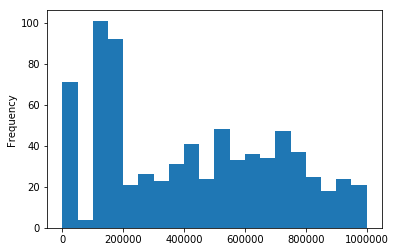

In [8]:
_=schooldfs['Award Amount'].plot.hist(bins=20)
plt.show()

In [9]:
quartile75=671142
mean=schooldfs['Award Amount'].mean()
quartile25=162541

difference75_mean=quartile75-mean
print(difference75_mean)
differencemean_25=mean-quartile25
print(differencemean_25)

print('The differences between the 75th quartile-mean, and the mean-25th quartile are roughly the same.')


250314.10568031704
258286.89431968296
The differences between the 75th quartile-mean, and the mean-25th quartile are roughly the same.


In [10]:
npAward=np.array(schooldfs['Award Amount'])
#Converting the Award series to a numpy array and storing it in it's own variable. 
#Setting the alpha level and runnning the test.
alpha=0.05
stat,p=shapiro(npAward)
print('Statistics=%.3f, p=%.3f' %(stat, p))
#Setting up the interpretation of the test.
if p > alpha:
    print('fail to reject null hypothesis\nData is normally distributed')
else:
    print('reject H0,\nData is likely not normally distributed')

Statistics=0.941, p=0.000
reject H0,
Data is likely not normally distributed


===========================

After examining all three tells of the normality test, it is safe to assume that the data found within the Award column is not normally distributed.Caution to the use of the statistic mean. The data is skewed to the left, meaning that the use of average is more representative to the lower values of the distribution. Were the distribution normally distributed, I would place more weight to the use of average. Because of failure of normal distribution, for the purpose of this project, I will only use the Sum to make comparisons and report on them. 

==========================

# Grouping the Data

In [11]:
schooldfs['Nat_Award_Sum']=schooldfs['Award Amount'].sum()

# Creating a column that contains the sum so it can be used for comparison later

### Grouping by District

In [12]:
bydistrict= schooldfs.groupby(['State','District Name'])
# As the first step in analysis, I am grouping the dataset by State and district to calculate the sum of award allocation for each district per state

distsum=bydistrict['Award Amount'].agg('sum')
#aggregating the groupby by sum for analysis

DistSum= pd.DataFrame(distsum)# Creating a dataframe so I can utilize later and merge if need be
DistSum.columns=['District_Sum']

## Grouping by State

In [13]:
bystate=schooldfs.loc[:,['State','Award Amount','Nat_Award_Sum',]]
# Accessing the columns of interest for my new dataframe.

statesum=bystate.groupby('State')['Award Amount'].agg('sum')
# grouping by state and aggregating by sum for analysis.

#Creating a dataframe so i can manipulate column info and then merge with schooldfs and create a new DF for analysis 
StateSum=pd.DataFrame(statesum)

StateSum.columns=['State_Sum']
#renaming column to a more desciptive column head
StateSum=StateSum.reset_index()
# Resetting index to merge back into the combined school dataframe.

#### Merging the DataFrames

In [14]:
#Merging the two state dataframes back into the original and creating a new DF
School=pd.merge(StateSum, schooldfs, left_on='State',right_on='State')

# An examination of the type of Model selection by state, and the sum of money per model.



#### Sum Per Model



In [15]:

ModelSum=School.loc[:,['Model Selected','Award Amount']]
#Accessing the columns of interest

ModelSum=ModelSum.groupby('Model Selected')['Award Amount'].agg('sum')
#grouping by the model type and aggregating by the sum of the award amount
ModelSum=pd.DataFrame(ModelSum)
#Creating a DataFrame of the grouping
ModelSum.columns=['Nat_Model_Sum']
#renaming the columns to a more descriptive header
ModelSum=ModelSum.reset_index()
#resetting the index so I can Merge dataFrames
School=pd.merge(School,ModelSum,left_on='Model Selected',right_on='Model Selected')
#Merging with School Dataframe so I can plot results in later sections

#Printing the unique values for the new created from the previous merge.
print(School.Nat_Model_Sum.unique())

[2.35725022e+08 1.66126100e+07 6.50265960e+07 1.20248800e+06]


### State:

Now I will examine individual states and calculate the percent difference for the average funds granted to schools based on the type of model selected per state from the national average amount of funds granted to schools across all states. Where do the differences lie between states? This might be a good informative piece to see where the funds of the budget per model are allocated to per state. Will be good to cross reference with the count of models per state and see if there is an explanation as to why there are unusually high amounts of funds allocated per individual states.

In [16]:

StateModel=School[['State','Model Selected','Award Amount','Nat_Model_Sum']]
# Selecting the columns of interest
StateModel=StateModel.groupby(['State','Model Selected'])['Award Amount'].agg('sum')
#Grouping by the State and the model selected and aggregating the values by mean.
StateModel=pd.DataFrame(StateModel)

StateModel.columns=['Sum_Award_Amount']
#Resetting the columns to a more proper description
StateModel=StateModel.reset_index()

Merge2=School.loc[:,['Model Selected','Nat_Model_Sum']]

StateModel=pd.merge(StateModel,Merge2,left_on='Model Selected',right_on='Model Selected')

StateModel.drop_duplicates(inplace=True)

StateModel.columns=['State','Model Selected','Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US']

StateModel['Funds_per_state_model_by_total_model_type_funds'] = ((StateModel.Sum_of_Funds_for_Model_per_State / StateModel.Sum_of_Total_Funds_by_model_in_US)*100)
#Calculating the sum of funds for each model by state
StateModel['Model_type_funds_by_Total_Funds']=((StateModel.Sum_of_Total_Funds_by_model_in_US/(School['Award Amount'].sum()))*100)
#caluclating the percentages that the sum of funds for each model type is of the total amount of funds.
StateModel1=StateModel.loc[:,['State','Model Selected','Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US','Model_type_funds_by_Total_Funds','Funds_per_state_model_by_total_model_type_funds']]
# Seperating the dataframe collecting only the columns of interest for analysis

StateModel1= StateModel1.sort_values(['State','Model Selected']).set_index(['State','Model Selected'])

print('StateModel1 head and info\n===================================')
print(StateModel1.head())
print('\n=====================================\n')
print(StateModel1.info())

StateModel1 head and info
                      Sum_of_Funds_for_Model_per_State  \
State Model Selected                                     
AK    Restart                                 697703.0   
      Transformation                         2909713.0   
AL    Transformation                         2300782.0   
AR    Transformation                         3936109.0   
AZ    Transformation                         8685637.0   

                      Sum_of_Total_Funds_by_model_in_US  \
State Model Selected                                      
AK    Restart                                16612610.0   
      Transformation                        235725022.0   
AL    Transformation                        235725022.0   
AR    Transformation                        235725022.0   
AZ    Transformation                        235725022.0   

                      Model_type_funds_by_Total_Funds  \
State Model Selected                                    
AK    Restart                          

=====================

Above is a table collecting the mean amount of money dedicated to the models throughout the state in comparison to the mean amount of money dedicated to the models overall throughout the country. The type of model can give us an idea as to how bad the schools in the state are in need of turning around. The amount of money allocated per model in each state in comparison to the national average can give us an idea as to how bad the state schools are in need of reformation. 

=====================

# Model Counts per state

I want to graph the count of the models per state to get a sense of an idea as to what the States are choosing for models of reform. Will be interesting to cross reference with the average amount of money each state is getting for the chosen models.

In [17]:
StateModelCounts=School[['State','Model Selected']]
# Creating a dataframe for the columns of interest
StateModelCounts=StateModelCounts.groupby('State')['Model Selected'].value_counts()
#Grouping the columns off of state and aggregating the models by the value counts
StateModelCounts= pd.DataFrame(StateModelCounts)
# Created a dataframe out of the model counts
StateModelCounts.columns=['Model_Counts_per_State']
#Renamed the columns to a proper description.

print('This is the count of the Models selected per State\n')
print(StateModelCounts.head())
print(StateModelCounts.info())

This is the count of the Models selected per State

                      Model_Counts_per_State
State Model Selected                        
AK    Transformation                       6
      Restart                              1
AL    Transformation                      11
AR    Transformation                       7
AZ    Transformation                      12
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 92 entries, (AK, Transformation) to (WY, Transformation)
Data columns (total 1 columns):
Model_Counts_per_State    92 non-null int64
dtypes: int64(1)
memory usage: 1.4+ KB
None


# Plotting

Display the total amount of funds. 318 million. Plot the breakdown of those funds by model type in the US. Then Plot the the model types by state across the US. Then display the Sum of funds by model type per state. Display the percentage that each state receives out of the total funds allocated per model type. Then display the sum of money that each district receives, then display a geomap displaying the money that each school receives and the model type they have.

## Plotting Funds and Percentages Allocated to each model Type

Choose this one for presentation


In [18]:
StateModel2=StateModel1.reset_index()
#creating a new DF by resetting the  index of the StateModel dataframe
TotalFunds=School['Award Amount']
#Creating a new series and transforming into a dataframe to create a dataframe capable of plotting alongside the 
#sum of funds per model and the percentage of sums.
TotalFunds=pd.DataFrame(TotalFunds)
TotalFunds['XLabel']='Total Funds'
TotalFunds['Sum of Funds']=TotalFunds['Award Amount'].sum()


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



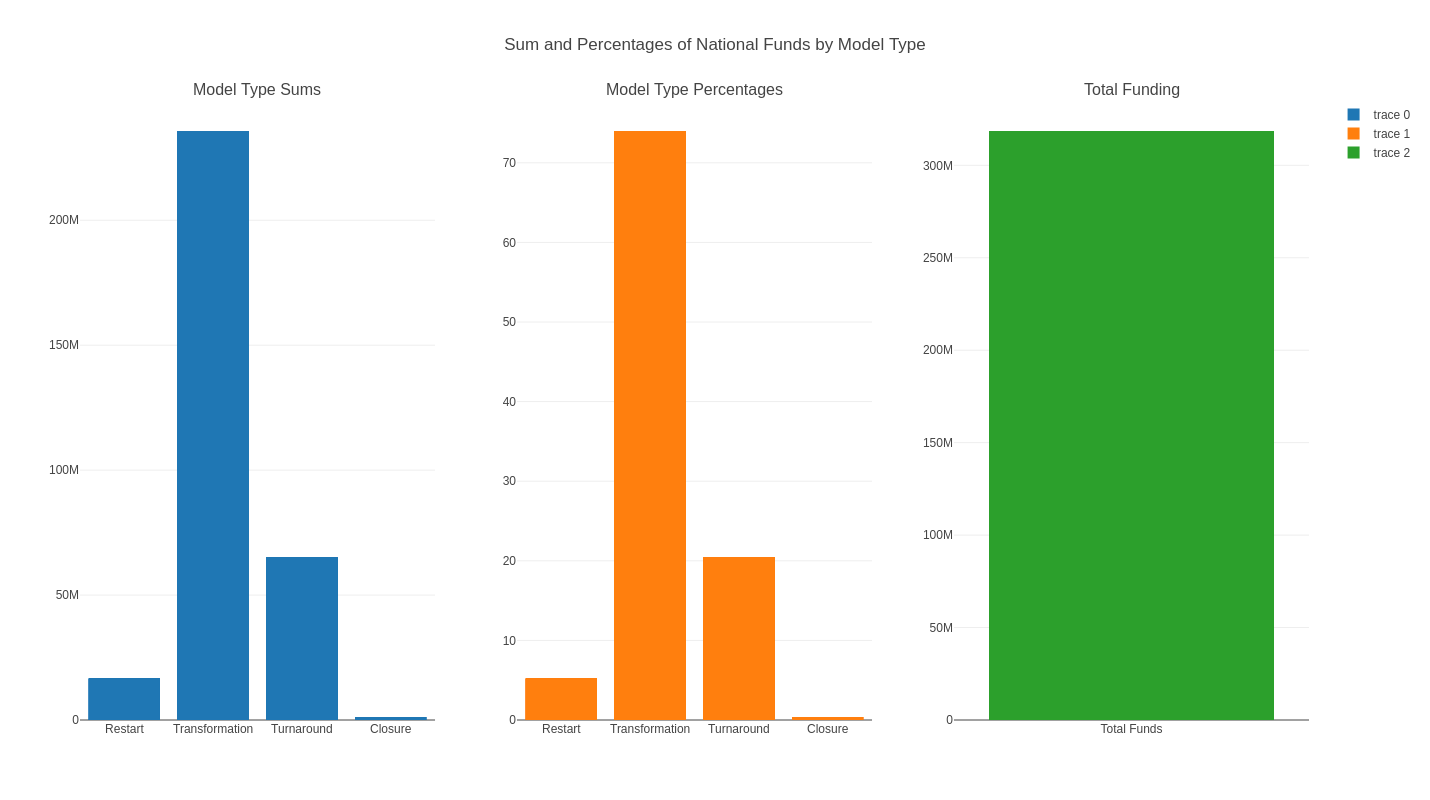

In [19]:
Sums=go.Bar(x = StateModel2['Model Selected'], y =StateModel2.Sum_of_Total_Funds_by_model_in_US )
Percentages=go.Bar(x = StateModel2['Model Selected'], y = StateModel2.Model_type_funds_by_Total_Funds)
TotalFunds=go.Bar(x=TotalFunds.XLabel,y=TotalFunds['Sum of Funds'])
#Creating the individual interactive bar graphs for the subplot.
fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Model Type Sums', 'Model Type Percentages','Total Funding'))
#giving a title and positioning each graph in the subplot
fig.append_trace(Sums, 1,1)
fig.append_trace(Percentages, 1,2)
fig.append_trace(TotalFunds, 1,3)

fig['layout'].update(height=800, width=900, title='Sum and Percentages of National Funds by Model Type')
#adjusting the layout of the graph.
iplot(fig)

# Plot of Model Counts for each State + Plot of the Sum of money allocated per State

In [20]:
StateModelCounts=StateModelCounts.reset_index()
#restting the index of the Model counts DF for plotting purposes.
StateModelCounts['Xlabelcount']=StateModelCounts.State.str.cat(StateModelCounts['Model Selected'],sep='-')
#Creating the x label for the graph

### Subplots for Funds allocated by State and the Model Counts by State

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



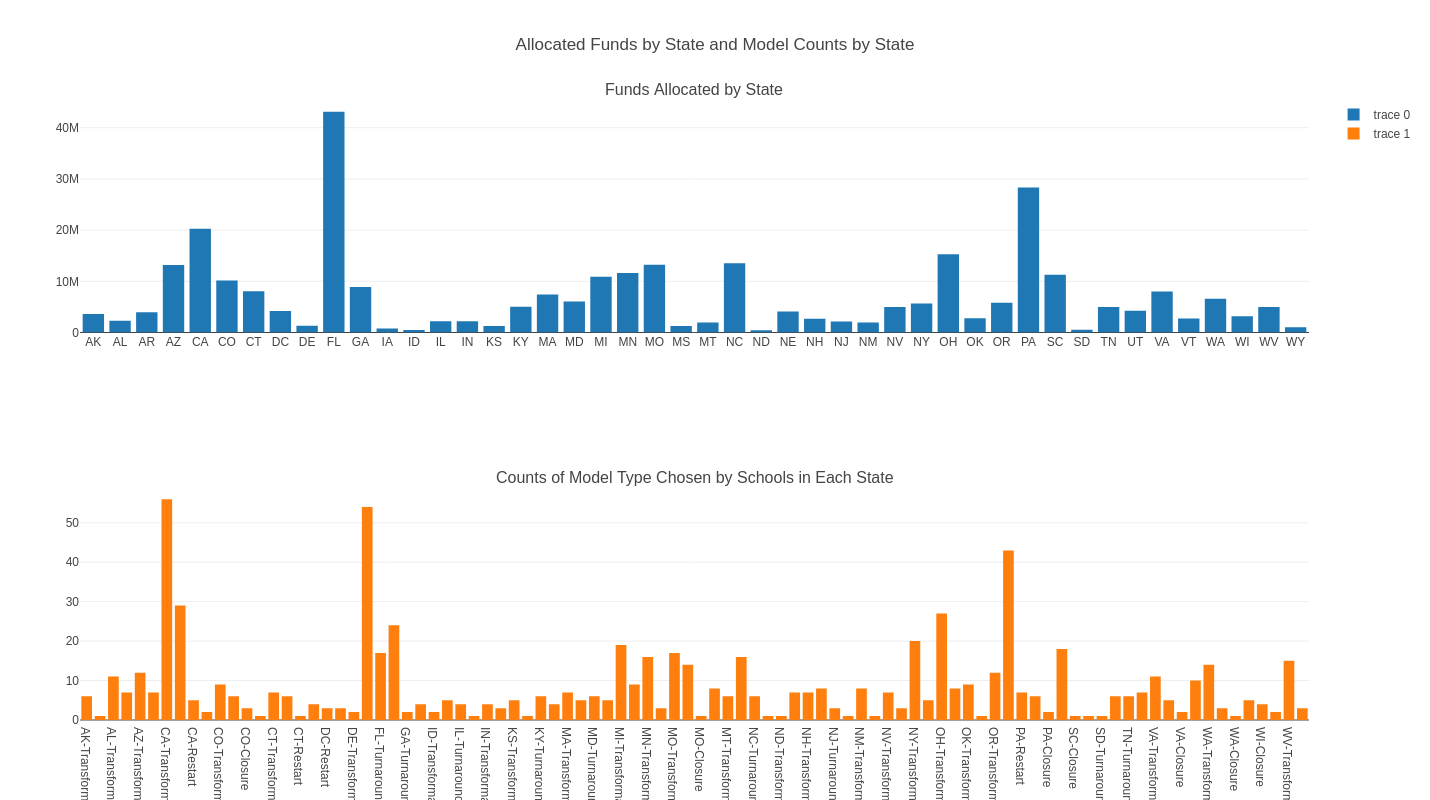

In [21]:
Allocated=go.Bar(x = StateSum.State, y =StateSum.State_Sum)
StateModelCount=go.Bar(x = StateModelCounts.Xlabelcount, y =StateModelCounts.Model_Counts_per_State)


fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Funds Allocated by State', 'Counts of Model Type Chosen by Schools in Each State'))

fig.append_trace(Allocated, 1,1)
fig.append_trace(StateModelCount, 2,1)

fig['layout'].update(height=800, width=900, title='Allocated Funds by State and Model Counts by State')

iplot(fig)

#### What is interesting to see here is to compare the total amount of funds allocated to each state and compare that to the total amount school models chosen by state. Look at california, They have more schools, especially more schools who have chosen the Transformation model. The most common type of reform, yet the funds allocated to that state are but a fraction of the funds allocated to Florida. These types of discrepancies warrant further investigation. From this I will examine the amount of funds allocated to each state by the type of models chosen by the schools.

# Funding Sum of model per state

### The plots are likely too large. I will create a new dataframe for each Reform Model.

### Type of Models

In [22]:
#TransformationModel
StateTransFormation=StateModel1.loc[(slice(None),'Transformation'),['Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US','Model_type_funds_by_Total_Funds','Funds_per_state_model_by_total_model_type_funds']]
#Creating a new DF for each model type so i can plot
StateTransFormation=StateTransFormation.reset_index()

#RestartModel
StateRestart=StateModel1.loc[(slice(None),'Restart'),['Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US','Model_type_funds_by_Total_Funds','Funds_per_state_model_by_total_model_type_funds']]

StateRestart=StateRestart.reset_index()

#TurnaroundModel
StateTurn=StateModel1.loc[(slice(None),'Turnaround'),['Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US','Model_type_funds_by_Total_Funds','Funds_per_state_model_by_total_model_type_funds']]
StateTurn=StateTurn.reset_index()

#ClosureModel
StateClose=StateModel1.loc[(slice(None),'Closure'),['Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US','Model_type_funds_by_Total_Funds','Funds_per_state_model_by_total_model_type_funds']]
StateClose=StateClose.reset_index()


### Subplots for the Models

##### The Sums

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



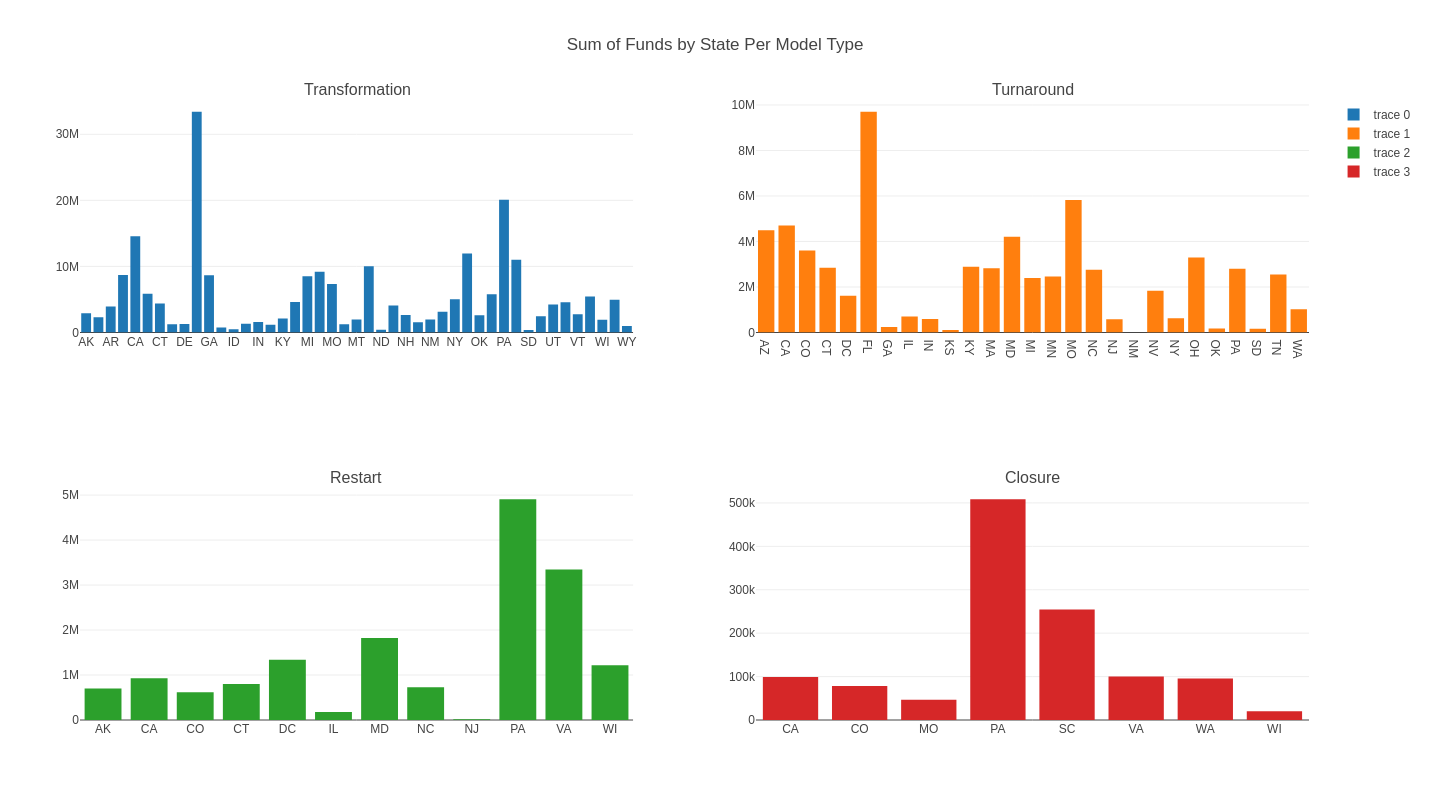

In [23]:
#Same process as previous subplot
Transformation=go.Bar(x = StateTransFormation.State, y =StateTransFormation.Sum_of_Funds_for_Model_per_State)
Turnaround=go.Bar(x = StateTurn.State, y =StateTurn.Sum_of_Funds_for_Model_per_State)
Restart=go.Bar(x = StateRestart.State, y =StateRestart.Sum_of_Funds_for_Model_per_State)
Closure=go.Bar(x = StateClose.State, y =StateClose.Sum_of_Funds_for_Model_per_State)

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Transformation', 'Turnaround',
                                                          'Restart', 'Closure'))

fig.append_trace(Transformation, 1,1)
fig.append_trace(Turnaround, 1,2)
fig.append_trace(Restart, 2,1)
fig.append_trace(Closure, 2,2)

fig['layout'].update(height=800, width=900, title='Sum of Funds by State Per Model Type')

iplot(fig)


#### When you examine the allocation of funds by model per state, we can see that states like florida and Pennsylvania have an unusually high amount of funds given to these schools for these models. This analysis provides a breakdown into what types of reform the money is being allocated to.

### The percentages

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



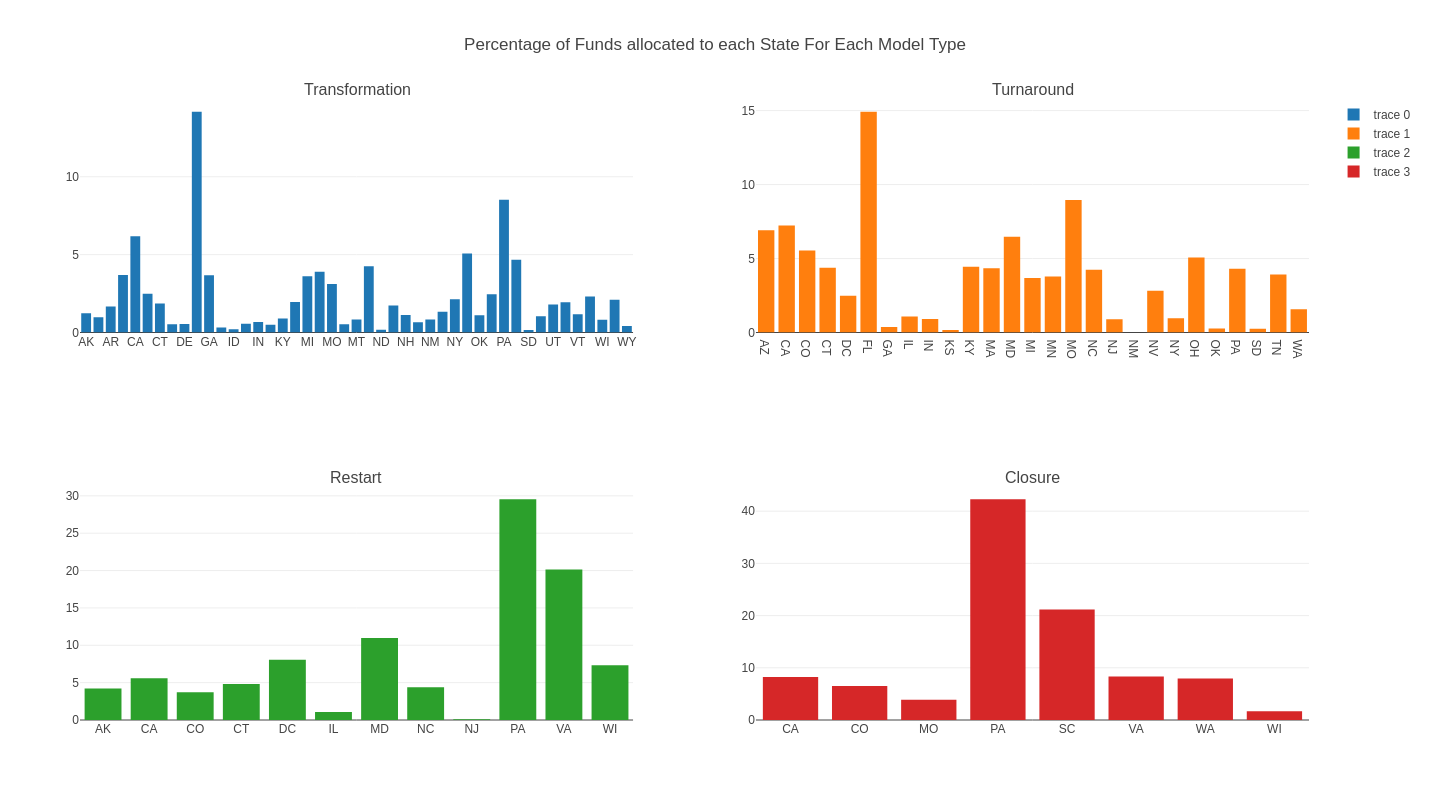

In [24]:
#Same process
Transformation=go.Bar(x = StateTransFormation.State, y =StateTransFormation.Funds_per_state_model_by_total_model_type_funds)
Turnaround=go.Bar(x = StateTurn.State, y =StateTurn.Funds_per_state_model_by_total_model_type_funds)
Restart=go.Bar(x = StateRestart.State, y =StateRestart.Funds_per_state_model_by_total_model_type_funds)
Closure=go.Bar(x = StateClose.State, y =StateClose.Funds_per_state_model_by_total_model_type_funds)

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Transformation', 'Turnaround',
                                                          'Restart', 'Closure'))

fig.append_trace(Transformation, 1,1)
fig.append_trace(Turnaround, 1,2)
fig.append_trace(Restart, 2,1)
fig.append_trace(Closure, 2,2)

fig['layout'].update(height=800, width=900, title='Percentage of Funds allocated to each State For Each Model Type')

iplot(fig)

Another way to look at the money allocated to states per type of model is by the percentage of total funds. So, of all the money that is allocated to the respected models. The percentages per state is calculated above. Refer to the fisrt figure to see how much money is allocated to each type of model.

# Plot of the Sum of Money for each district within each State

In [25]:
DistrictSum=DistSum.reset_index() 
#Resetting the index for ploting purposes
DistrictSum['State-District']=DistrictSum.State.str.cat(DistrictSum['District Name'],sep='-')
#creating a new column to concatenate the State with the district name for plotting purposes

##  An interactive map, displaying the locations of the Districts, the funds for each District.

#### Seperating out the Long and Latitutde to create id tags for each school district.

In [26]:
Location=School.loc[:,['School Name','District Name','Award Amount','Location']]

Location["Latitude"]  = Location.Location.str.split("\n").apply(pd.Series)[2].str.replace("(", "").str.replace(")", "").str.split(",").apply(pd.Series)[0].astype(float)
Location["Longitude"] = Location.Location.str.split("\n").apply(pd.Series)[2].str.replace("(", "").str.replace(")", "").str.split(",").apply(pd.Series)[1].astype(float)
#Seperating the longitude and latitude out of the Location column so i can utilize in a map plot.
DistrictLocation=Location['District Name'] ## Creating District Location so i can create new longitude and lat 
#columns the rows will match so there will be no missing values

DistrictLocation=pd.DataFrame(DistrictLocation)
#Creating a dataframe out of the series
DistrictLocation.drop_duplicates(subset='District Name',inplace=True)
#dropping duplicates from the DF
DistrictLocation=DistrictLocation.sort_values(by='District Name')
#Sorting by the districe name
DistrictLocation=DistrictLocation.reset_index()
#resetting indec
DistrictLocation.drop(columns='index',inplace=True)
#dropping the index column 

LocGroup1=Location.groupby(['District Name'])['Latitude'].mean()
## I had to group the latitude column to create a location for each district instead of just the schools. 
#This involved grouping by districts and aggregating by the mean.

LocGroup2=Location.groupby(['District Name'])['Longitude'].mean()
#Same process

LocGroupLat=pd.DataFrame(LocGroup1)
LocGroupLat=LocGroupLat.reset_index()
LocGroupLat.columns=[['District_Name','District Lat']]
#Creating a DF to create a new Lat column

LocGroupLong=pd.DataFrame(LocGroup2)
LocGroupLong=LocGroupLong.reset_index()
LocGroupLong.columns=[['District_Name','District Long']]
#Same for Long

DistrictLocation['District_Latitude']= LocGroupLat['District Lat']
DistrictLocation['District_Longitude']=LocGroupLong['District Long']
DistrictLocation['Sum_Award']=DistrictSum.District_Sum
#Setting everything up to plot

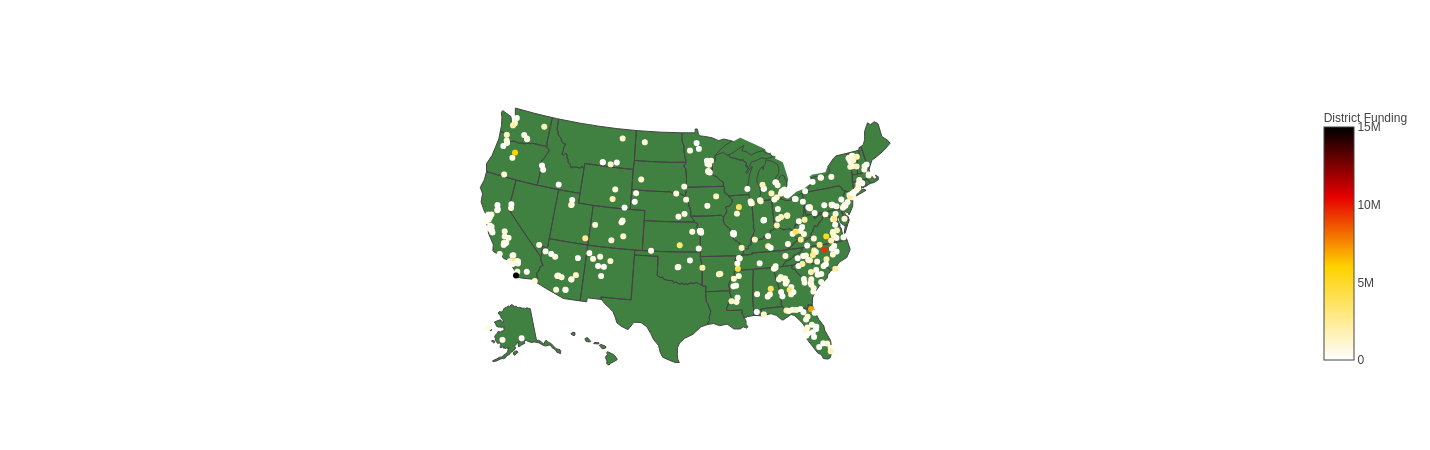

In [27]:
# This is a geo plot, it takes the long and lat for each district. Displayed is a map containing the values 
#for each district, it displays the districts and the associated money with them.
iplot(go.Figure(
    data = [
        go.Scattergeo(
            lon = DistrictLocation.District_Longitude,
            lat = DistrictLocation.District_Latitude,
            mode = "markers",
            text =  DistrictLocation['District Name']+ ' - $'+ DistrictLocation.Sum_Award.astype('str'),
            marker = {
                
                "color": DistrictLocation.Sum_Award,
                "colorscale": "Hot",
                "reversescale": True,
                "colorbar": {
                    "title": "District Funding"
                }
            }
        )
    ],
    
    layout = go.Layout(
        geo = dict(
            scope = "usa",
            showland = True,
            landcolor = "#408040",
            showocean = True,
            oceancolor = "#202020"
            
        )
    )))

## Table for the individual Schools

In [28]:
SchoolTable=School[['State','District Name','School Name','Award Amount','Model Selected']]
SchoolTable=SchoolTable.sort_values(by=(['State','District Name','School Name']))
#Creating a table out of the information to create the scatterplot and table data below.
Schoolinfo1=SchoolTable.State.str.cat(SchoolTable['District Name'],sep='-')
SchoolTable['School_Information']=Schoolinfo1.str.cat(SchoolTable['School Name'],sep='-')

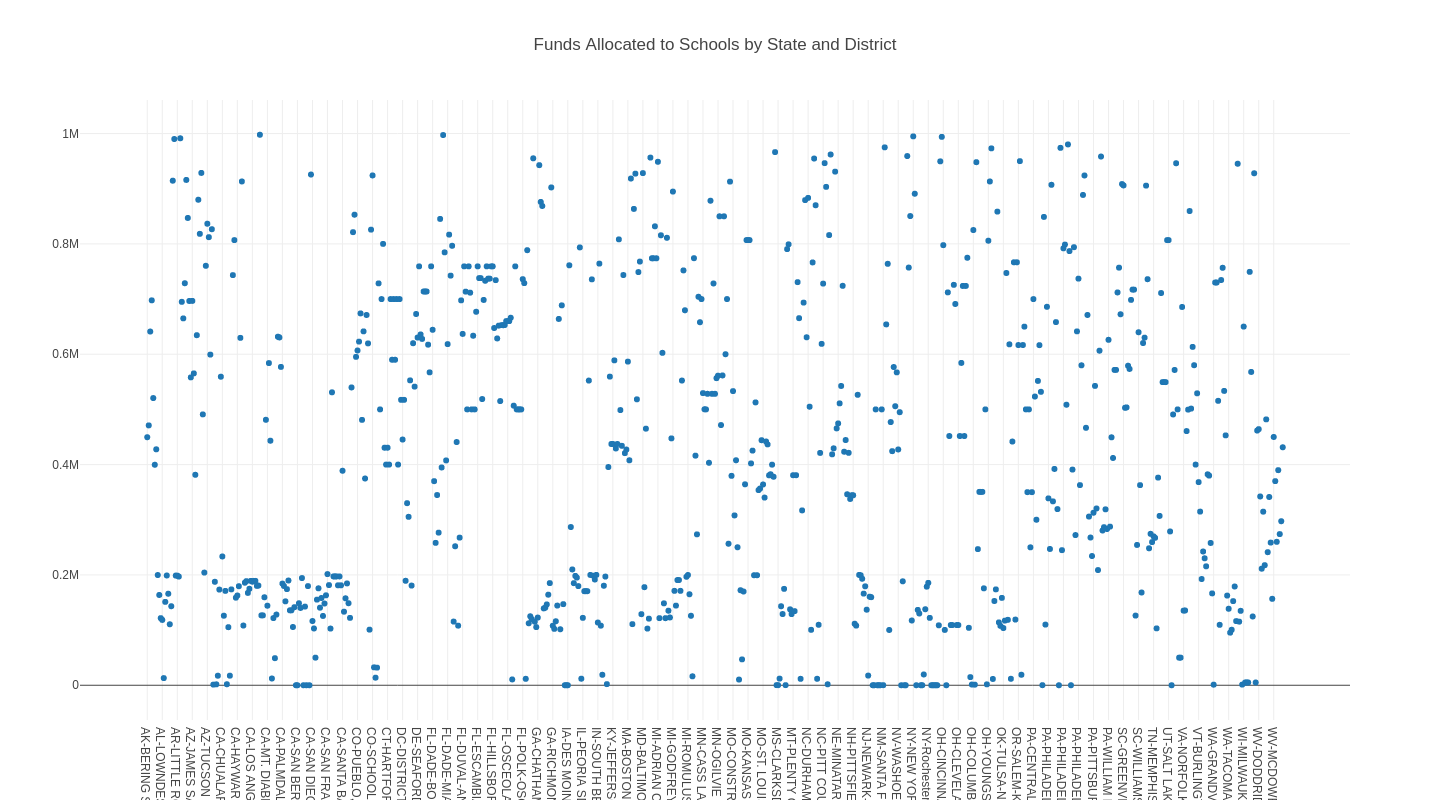

In [29]:
#Creating a scatterplot of the schools and their information
iplot(go.Figure(
    data = [
        go.Scatter(x = SchoolTable.School_Information, y = SchoolTable['Award Amount'],
        mode='markers',
        )
    ],
    
    
    layout = go.Layout(
        height = 800,
        width=1000,
        title='Funds Allocated to Schools by State and District',
        
    )
))

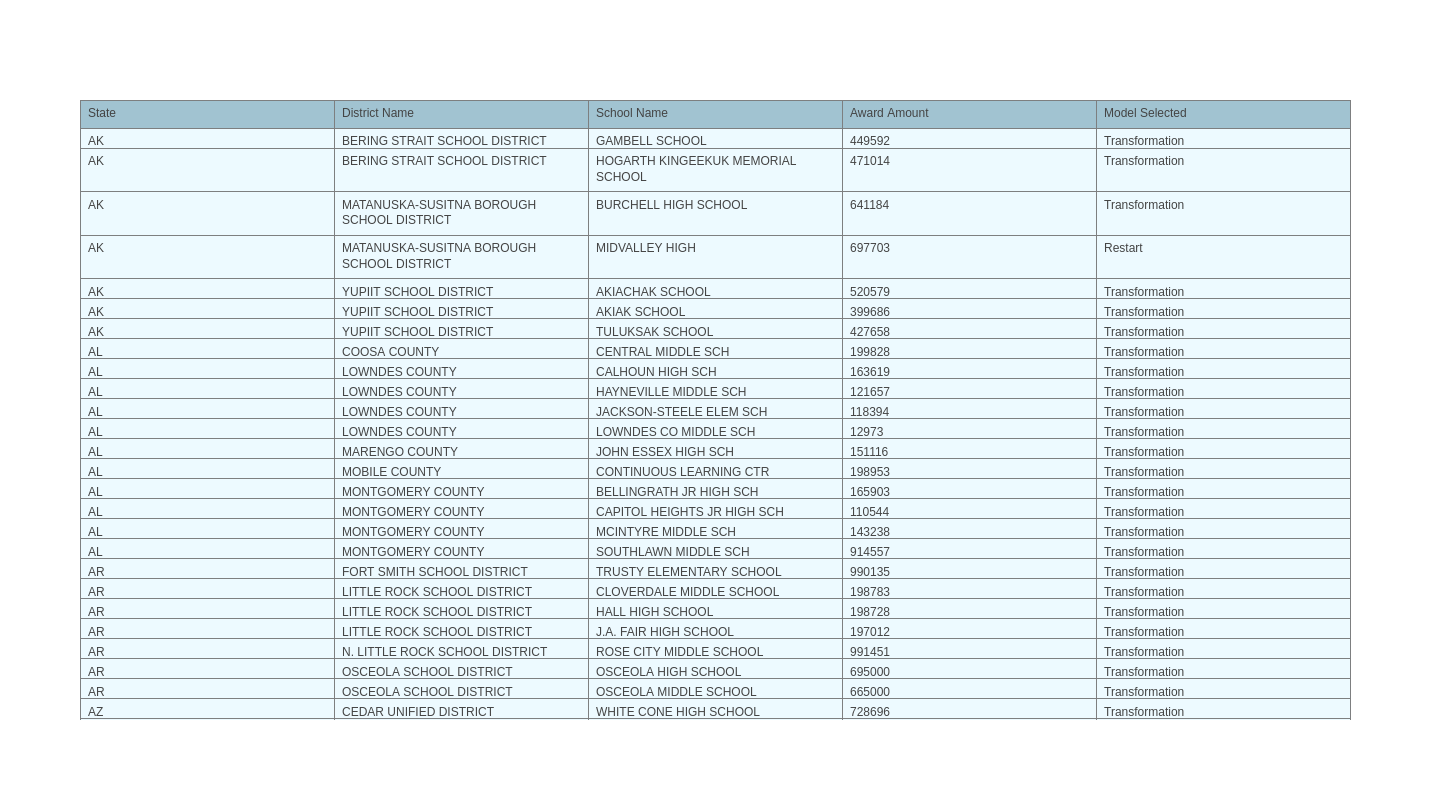

In [30]:
#Creating a datatable of the schools and their information
trace = go.Table(
    header=dict(values=['State', 'District Name', 'School Name', 'Award Amount','Model Selected'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[SchoolTable['State'],
                       SchoolTable['District Name'],
                       SchoolTable['School Name'],
                       SchoolTable['Award Amount'],
                      SchoolTable['Model Selected']],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=1000, height=800)
data = [trace]
fig = dict(data=data, layout=layout)
iplot(fig)

